<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/data_loading_preprocessing_set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. LOAD DATASET 1**

In [1]:
!gdown --fuzzy "https://drive.google.com/file/d/1M0uN1jbjbOh3b6fjDfe2qrNnYSJrgfwY/view?usp=drive_link"

Downloading...
From: https://drive.google.com/uc?id=1M0uN1jbjbOh3b6fjDfe2qrNnYSJrgfwY
To: /content/Dataset_1.zip
100% 831M/831M [00:09<00:00, 84.3MB/s]


In [2]:
!unzip /content/Dataset_1.zip

Streaming output truncated to the last 5000 lines.
  inflating: Colorectal Cancer/MUS/MUS-CIHSSWPV.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIHWTRHA.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIILSKST.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIIMVVTT.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIITQWPP.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIKANVTM.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIKKELKA.tif  
  inflating: Colorectal Cancer/MUS/MUS-CILPKGCQ.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIMWFGFH.tif  
  inflating: Colorectal Cancer/MUS/MUS-CINGCMFK.tif  
  inflating: Colorectal Cancer/MUS/MUS-CINGLGES.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIPMCCVS.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIPNEIRF.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIQAGCRV.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIQFFGDI.tif  
  inflating: Colorectal Cancer/MUS/MUS-CIRAICLW.tif  
  inflating: Colorectal Cancer/MUS/MUS-CISHTCWQ.tif  
  inflating: Colorectal Cancer/

**2. DATASET 1 PREPROCESSING**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
# Define paths
base_dir = '/content/Colorectal Cancer'
classes = ['MUS', 'NORM', 'STR']

In [5]:
# Initialize the ImageDataGenerator with rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=(0.9, 1.1),
    channel_shift_range=20,  # for slight color variations
    fill_mode='reflect'
)

The augmentations done are as follows:

    rescale=1./255:
        This rescales the image pixel values from a range of [0, 255] to [0, 1], which is a common practice for neural network inputs.

    rotation_range=180:
        Randomly rotates the image between 0 and 180 degrees in both directions (clockwise and counter-clockwise).

    width_shift_range=0.1 and height_shift_range=0.1:
        Randomly translates (shifts) the image horizontally and vertically by up to 10% of the image's width and height, respectively.

    horizontal_flip=True and vertical_flip=True:
        Randomly flips the image horizontally (left to right) and vertically (top to bottom). This is useful for datasets where the orientation of the subject can vary.

    zoom_range=0.2:
        Randomly zooms the image in and out by up to 20%. A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out.

    brightness_range=(0.9, 1.1):
        Randomly adjusts the brightness of the image by a factor chosen from the range [0.9, 1.1]. Values less than 1.0 darken the image, while values greater than 1.0 brighten it.

    channel_shift_range=20:
        Randomly shifts the color channels by a value in the range [-20, 20]. This changes the colors of the images but retains the structure.

    fill_mode='reflect':
        Specifies the strategy used to fill in new pixels that can appear after a rotation or width/height shift. 'Reflect' means that the filling will be a reflection of the border pixels.

Found 6000 images belonging to 3 classes.


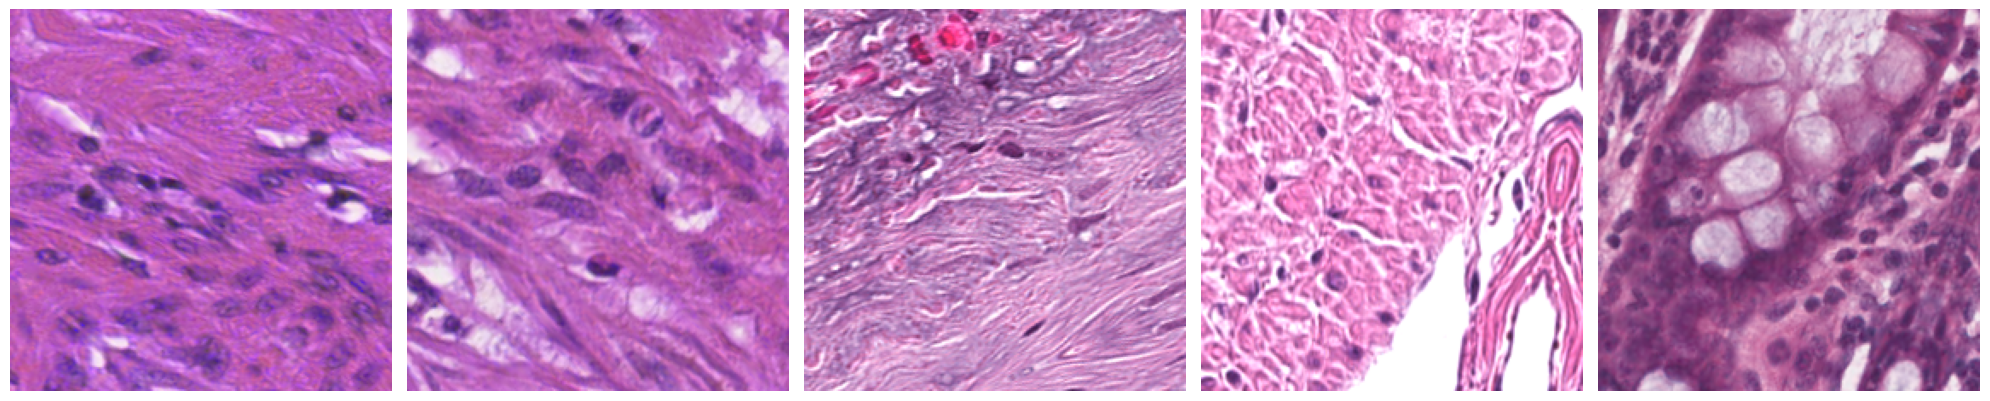

In [6]:
# Visually verify if the augmented images look correct
augmented_data_gen = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    batch_size=16,
    target_size=(224, 224),
    color_mode='rgb',
    shuffle=True
)

# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Generate a batch of augmented images
augmented_images, _ = next(augmented_data_gen)

# Convert the images to unsigned integers for display
augmented_images = (augmented_images * 255).astype('uint8')

# Plot the images
plot_images(augmented_images[:5])  # Plotting 5 images, change as needed

In [7]:
from PIL import UnidentifiedImageError

# Function to load the images
def load_images_and_labels(class_dirs, base_dir, target_size=(224, 224)):
    images = []
    labels = []
    for label, class_dir in enumerate(class_dirs):
        class_folder = os.path.join(base_dir, class_dir)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            try:
                img = load_img(img_path, target_size=target_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label)
            except UnidentifiedImageError as e:
                print(f'Could not load image: {img_path}. Error: {e}')
    return np.array(images), np.array(labels)

In [8]:
# Load all the images and labels
images, labels = load_images_and_labels(classes, base_dir)

Could not load image: /content/Colorectal Cancer/MUS/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7debc07024d0>
Could not load image: /content/Colorectal Cancer/NORM/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7debc30da840>
Could not load image: /content/Colorectal Cancer/STR/.DS_Store. Error: cannot identify image file <_io.BytesIO object at 0x7debc10174c0>


**This part is used to visually compare a small subset of the original images and the augmented images**

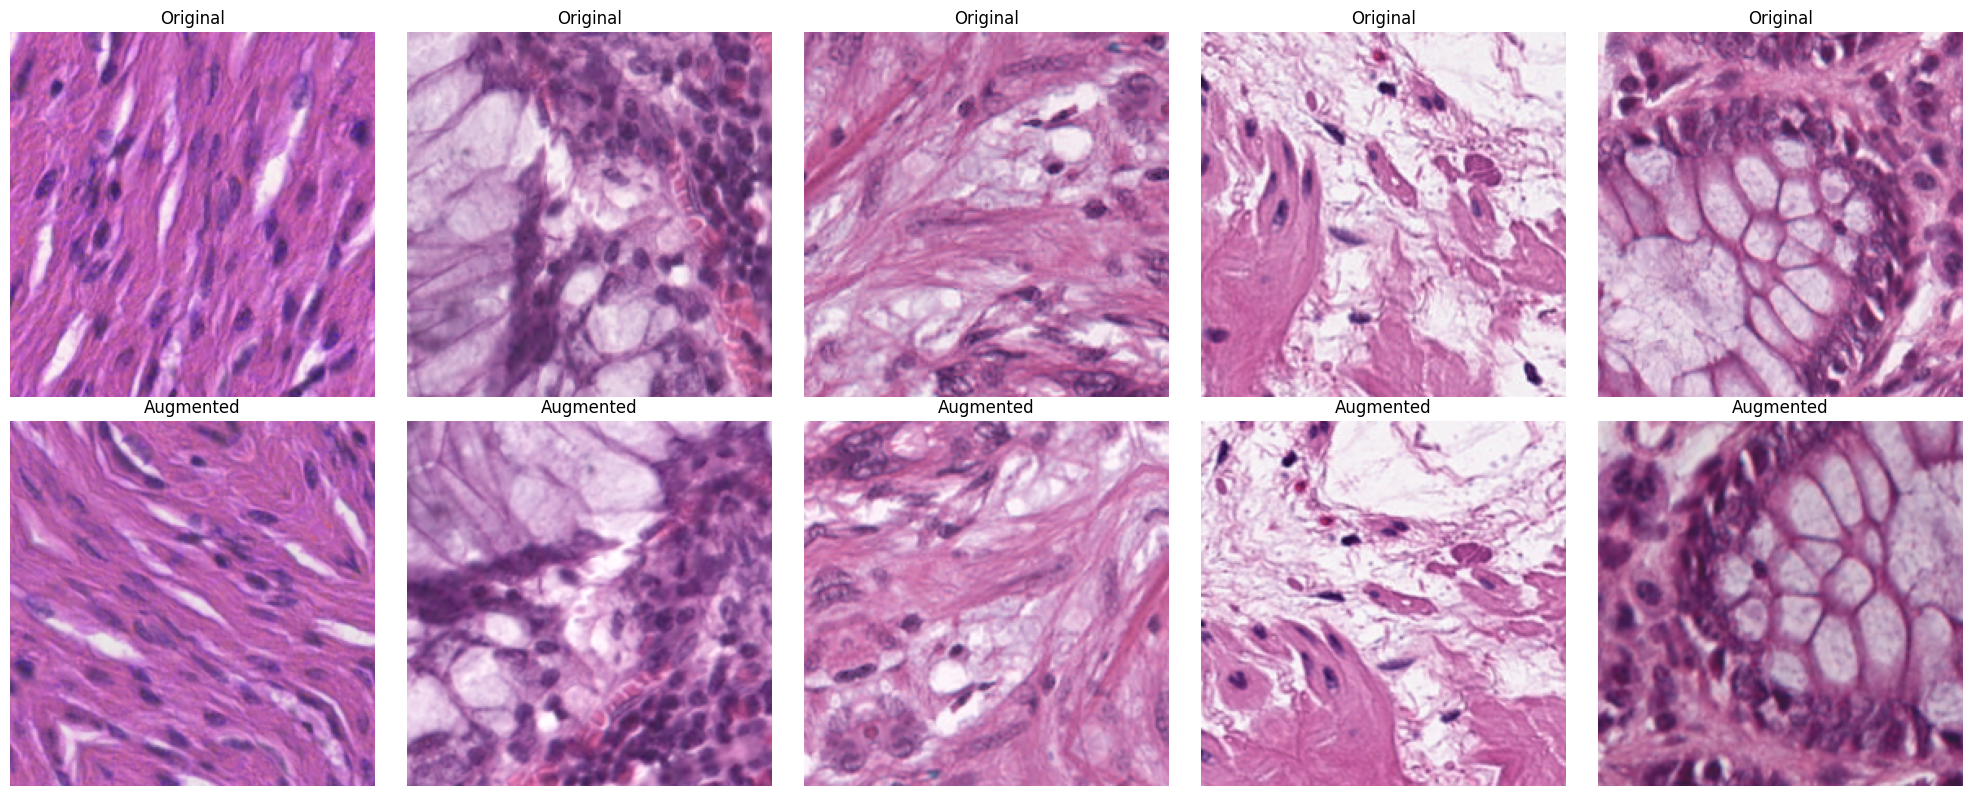

In [9]:
num_images_to_augment = 5
indices = np.random.choice(len(images), num_images_to_augment, replace=False)
selected_images = images[indices]
selected_labels = labels[indices]

# Function to plot images side by side for comparison
def plot_images_side_by_side(original_images, augmented_images):
    assert len(original_images) == len(augmented_images), "The number of original and augmented images must match"

    num_images = len(original_images)
    fig, axes = plt.subplots(2, num_images, figsize=(20, 8))  # Two rows: one for original, one for augmented
    axes = axes.ravel()

    for i in range(num_images):
        # Original images on the top row
        axes[i].imshow(original_images[i].astype('uint8'))
        axes[i].set_title('Original')
        axes[i].axis('off')

        # Corresponding augmented images on the bottom row
        axes[i + num_images].imshow(augmented_images[i].astype('uint8'))
        axes[i + num_images].set_title('Augmented')
        axes[i + num_images].axis('off')

    plt.tight_layout()
    plt.show()

# Create a generator for the selected images
image_gen = datagen.flow(selected_images, selected_labels, batch_size=num_images_to_augment, shuffle=False)

# Get the augmented images
selected_augmented_images, _ = image_gen.next()
selected_augmented_images_uint8 = np.clip(selected_augmented_images * 255, 0, 255).astype('uint8')

# Now you can plot the original and augmented images side by side
plot_images_side_by_side(selected_images, selected_augmented_images_uint8)

In [10]:
# Apply data augmentation and normalization
augmented_images = datagen.flow(images, labels, batch_size=len(images), shuffle=True).next()

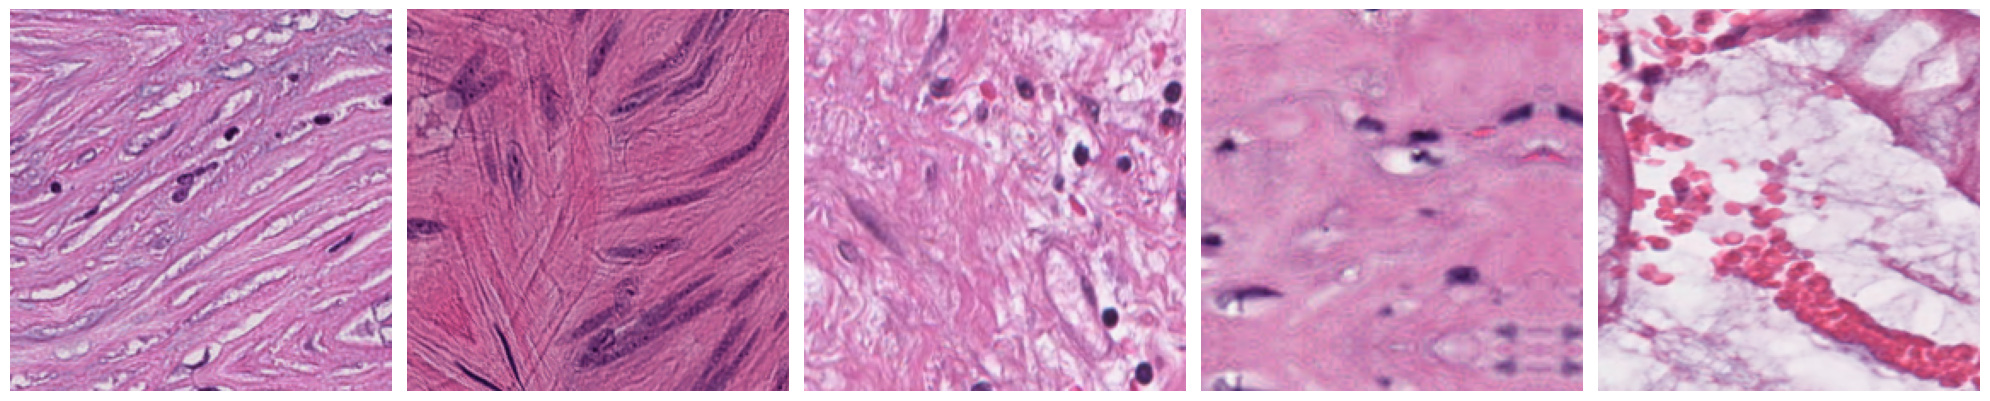

In [11]:
# Verify if the images are augmented correctly

# 'augmented_images' is a tuple where the first element is the image batch
# and the second element is the label batch. Need to separate them first.
augmented_images_batch, augmented_labels_batch = augmented_images

# Now 'augmented_images_batch' is the NumPy array you want to inspect.
# Select a random subset of images to display
num_images_to_display = 5
random_indices = np.random.choice(augmented_images_batch.shape[0], num_images_to_display, replace=False)
selected_images = augmented_images_batch[random_indices]

# Convert the selected images to unsigned integers for display if they have been rescaled
selected_images_uint8 = (selected_images * 255).astype('uint8')

# Use the plot_images function to display the selected images
plot_images(selected_images_uint8)


In [12]:
# Split the data and save the sets into npy arrays

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(
    augmented_images_batch, augmented_labels_batch,
    test_size=0.2,
    random_state=42
)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 1/train_data.npz', images=X_train, labels=y_train)
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 1/test_data.npz', images=X_test, labels=y_test)

In [15]:
print(f"Unique labels in dataset: {np.unique(labels)}")

Unique labels in dataset: [0 1 2]


In [17]:
# Load the training data
train_data = np.load('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 1/train_data.npz')
X_train = train_data['images']
y_train = train_data['labels']

# Load the testing data
test_data = np.load('/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/Dataset 1/test_data.npz')
X_test = test_data['images']
y_test = test_data['labels']


In [18]:
print(f"Unique labels in training set: {np.unique(y_train)}")
print(f"Unique labels in test set: {np.unique(y_test)}")

Unique labels in training set: [0 1 2]
Unique labels in test set: [0 1 2]


In [19]:
(unique, counts) = np.unique(y_train, return_counts=True)
print(f"Training set class distribution: {dict(zip(unique, counts))}")

(unique, counts) = np.unique(y_test, return_counts=True)
print(f"Test set class distribution: {dict(zip(unique, counts))}")

Training set class distribution: {0: 1598, 1: 1605, 2: 1597}
Test set class distribution: {0: 402, 1: 395, 2: 403}


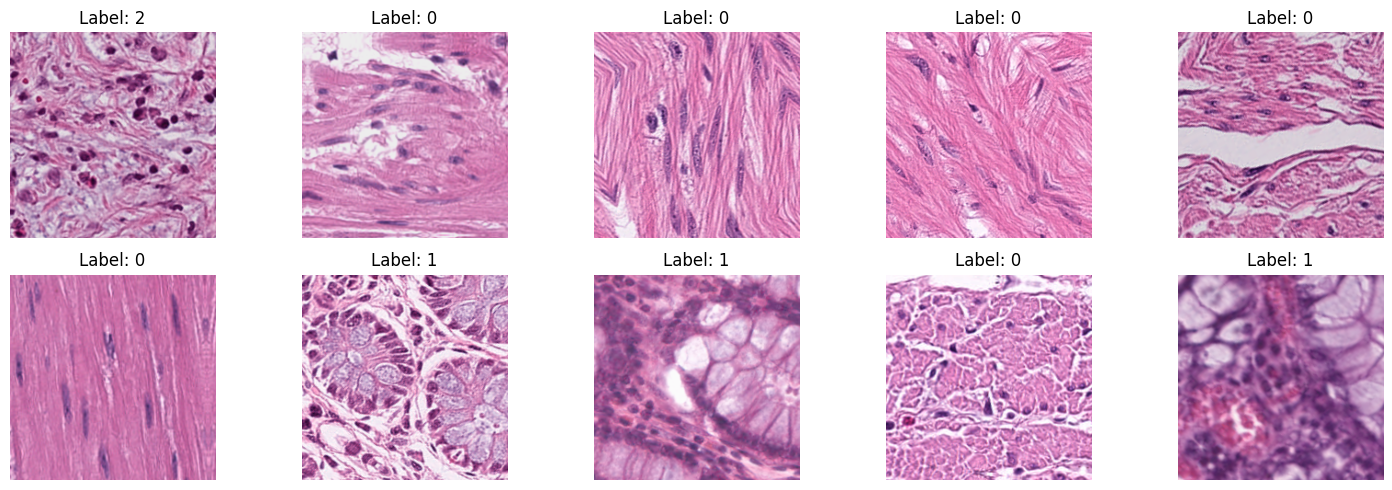

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot images in a grid
def plot_images(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
    axes = axes.ravel()
    idxs = np.random.choice(len(images), num_rows * num_cols, replace=False)
    for i, ax in enumerate(axes):
        ax.imshow(images[idxs[i]])
        ax.set_title(f"Label: {labels[idxs[i]]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot random images with labels
plot_images(X_train, y_train)
